In [1]:
import numpy as np
import skimage.io as ski
import matplotlib.pyplot as plt
import skimage.color as skc
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import morphology
import os
%matplotlib inline

In [3]:
map_im = ski.imread("5+Acacia+Ave.,+Berkeley,+CA.png")

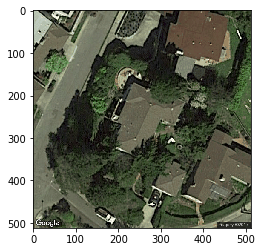

In [4]:
plt.imshow(map_im)

In [5]:
outline_im = ski.imread("5+Acacia+Ave.,+Berkeley,+CA_out.png")

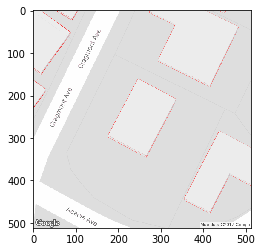

In [6]:
plt.imshow(outline_im)

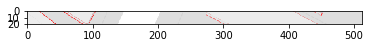

In [14]:
plt.imshow(outline_im[0:20])

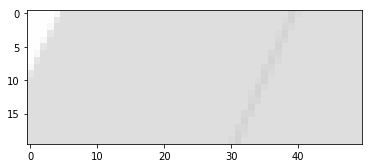

In [17]:
plt.imshow(outline_im[0:20, 200:250])

In [21]:
a = outline_im[0:20, 200:250]

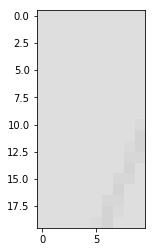

In [25]:
plt.imshow(a[:,25:35])

In [27]:
b = a[:,25:35]

In [30]:
copy_out = np.empty_like (outline_im)
copy_out[:] = outline_im
for i in range(512):
    for j in range(512):
        if((copy_out[i][j][0] != 211 and copy_out[i][j][1] != 211 and copy_out[i][j][2] != 211) and (copy_out[i][j][0] != 218 and copy_out[i][j][1] != 218 and copy_out[i][j][2] != 218) and (copy_out[i][j][0] != 215 and copy_out[i][j][1] != 215 and copy_out[i][j][2] != 215)):
            copy_out[i][j][0] = 0
            copy_out[i][j][1] = 0
            copy_out[i][j][2] = 0
        else:
            copy_out[i][j][0] = 255
            copy_out[i][j][1] = 255
            copy_out[i][j][2] = 255

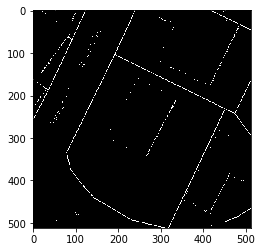

In [31]:
plt.imshow(copy_out)

In [32]:
grey_image = skc.rgb2gray(copy_out)

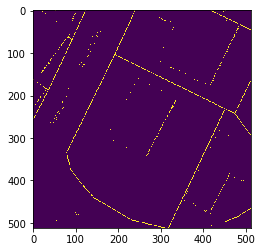

In [33]:
plt.imshow(grey_image)

In [34]:
fgi = (grey_image*255).astype(np.uint8)

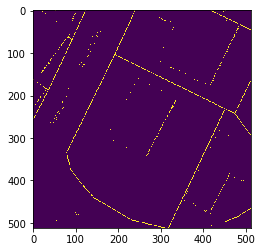

In [35]:
plt.imshow(fgi)

In [36]:
from skimage.util import img_as_ubyte
binary_img = img_as_ubyte(fgi)

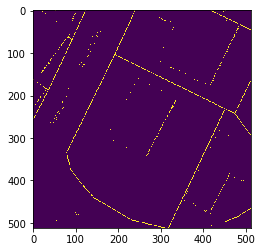

In [37]:
plt.imshow(binary_img)

In [39]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

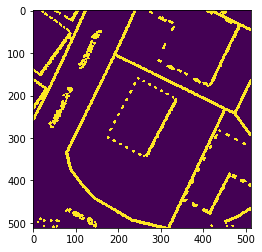

In [41]:
selem = disk(3)
dilated = dilation(binary_img, selem)
plt.imshow(dilated)

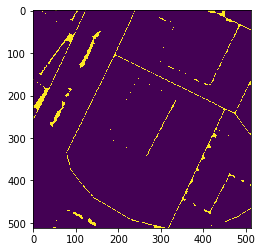

In [43]:
selem = disk(6)
closed = closing(binary_img, selem)
plt.imshow(closed)

In [44]:
filled_holes = ndi.binary_fill_holes(dilated)

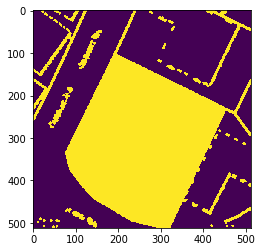

In [45]:
plt.imshow(filled_holes)

In [46]:
eroded = erosion(filled_holes, selem)

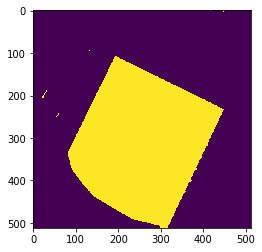

In [47]:
plt.imshow(eroded)

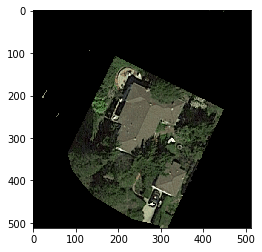

In [51]:
copy_main = np.empty_like (map_im)
copy_main[:] = map_im
for i in range(512):
    for j in range(512):
        if(not(eroded[i][j])):
            copy_main[i][j][0] = 0
            copy_main[i][j][1] = 0
            copy_main[i][j][2] = 0
plt.imshow(copy_main)